<a href="https://colab.research.google.com/github/SatChittAnand/Movie-Recommendation-System/blob/main/MLPWP_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Python ,pandas, numpy, naivebayes etc.

In [ ]:
import pandas as pd

In [ ]:
df={'Color':['Red','Blue','Green','Red','Blue','Green']}
pd.DataFrame(df)

,Color
0,Red
1,Blue
2,Green
3,Red
4,Blue
5,Green


In [ ]:
#labelencoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Color']=LE.fit_transform(df['Color'])
df

{'Color': array([2, 0, 1, 2, 0, 1])}

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np
OHE=OneHotEncoder()
dff=np.array(df['Color']).reshape(-1,1)
df['Color']=OHE.fit_transform(dff).toarray()
df


{'Color': array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]])}

In [ ]:
import numpy as np

# Generate the array
data = np.arange(11)
print("Original array:", data)

Original array: [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
for train,test in kf.split(data):
    print("Train:",train,"Test:",test)

Train: [ 3  4  5  6  7  8  9 10] Test: [0 1 2]
Train: [ 0  1  2  5  6  7  8  9 10] Test: [3 4]
Train: [ 0  1  2  3  4  7  8  9 10] Test: [5 6]
Train: [ 0  1  2  3  4  5  6  9 10] Test: [7 8]
Train: [0 1 2 3 4 5 6 7 8] Test: [ 9 10]


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming 'data' array is already defined from previous cells
# data = np.arange(11)

kf = KFold(n_splits=5)

print("Splitting data with KFold:")
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    print(f"Fold {fold+1}:")
    print("  Train indices:", train_index)
    print("  Test indices:", test_index)

Splitting data with KFold:
Fold 1:
  Train indices: [ 3  4  5  6  7  8  9 10]
  Test indices: [0 1 2]
Fold 2:
  Train indices: [ 0  1  2  5  6  7  8  9 10]
  Test indices: [3 4]
Fold 3:
  Train indices: [ 0  1  2  3  4  7  8  9 10]
  Test indices: [5 6]
Fold 4:
  Train indices: [ 0  1  2  3  4  5  6  9 10]
  Test indices: [7 8]
Fold 5:
  Train indices: [0 1 2 3 4 5 6 7 8]
  Test indices: [ 9 10]


In [ ]:
from sklearn.model_selection import StratifiedKFold
y=np.array([0,0,0,1,1,1,0,0,1,0,1])
skf=StratifiedKFold(n_splits=5)
for train,test in skf.split(data,y):
    print("Train:",train,"Test:",test)
# skf=StratifiedKFold(n_splits=5)
# for train,test in skf.split(data,data):
#     print("Train:",train,"Test:",test)

Train: [ 2  4  5  6  7  8  9 10] Test: [0 1 3]
Train: [ 0  1  3  5  6  7  8  9 10] Test: [2 4]
Train: [ 0  1  2  3  4  7  8  9 10] Test: [5 6]
Train: [ 0  1  2  3  4  5  6  9 10] Test: [7 8]
Train: [0 1 2 3 4 5 6 7 8] Test: [ 9 10]


In [ ]:
dff={'Age':[5,12,17,25,36,45,59,62,75,85]}
pd.DataFrame(dff)

,Age
0,5
1,12
2,17
3,25
4,36
5,45
6,59
7,62
8,75
9,85


In [ ]:
# Add a new column 'child<12'
New_dff = pd.DataFrame(dff)
New_dff['child'] = New_dff['Age'] < 12
New_dff['Teenager'] = (New_dff['Age'] >= 12) & (New_dff['Age'] < 18)
New_dff['Young Adult'] = (New_dff['Age'] >= 18) & (New_dff['Age'] < 35)
New_dff['Adult'] = (New_dff['Age'] >= 35) & (New_dff['Age'] < 60)
New_dff['Senior'] = New_dff['Age'] >= 60

# Display the updated DataFrame
display(New_dff)

,Age,child,Teenager,Young Adult,Adult,Senior
0,5,True,False,False,False,False
1,12,False,True,False,False,False
2,17,False,True,False,False,False
3,25,False,False,True,False,False
4,36,False,False,False,True,False
5,45,False,False,False,True,False
6,59,False,False,False,True,False
7,62,False,False,False,False,True
8,75,False,False,False,False,True
9,85,False,False,False,False,True


In [ ]:

age_df = pd.DataFrame(dff)

bins = [0, 12, 18, 35, 60, 100]
labels = ['child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

age_df['Age_Category'] = pd.cut(age_df['Age'], bins=bins, labels=labels)

age_df

,Age,Age_Category
0,5,child
1,12,child
2,17,Teenager
3,25,Young Adult
4,36,Adult
5,45,Adult
6,59,Adult
7,62,Senior
8,75,Senior
9,85,Senior


In [ ]:
import pandas as pd
import numpy as np

age_df = pd.DataFrame(dff)

age_df['Age_Category_Conditional'] = np.select(
    [
        age_df['Age'] < 12,
        (age_df['Age'] >= 12) & (age_df['Age'] < 18),
        (age_df['Age'] >= 18) & (age_df['Age'] < 35),
        (age_df['Age'] >= 35) & (age_df['Age'] < 60),
        age_df['Age'] >= 60
    ],
    [
        'child',
        'Teenager',
        'Young Adult',
        'Adult',
        'Senior'
    ],
    default='Baby' # Optional
)

print(age_df)

   Age Age_Category_Conditional
0    5                    child
1   12                 Teenager
2   17                 Teenager
3   25              Young Adult
4   36                    Adult
5   45                    Adult
6   59                    Adult
7   62                   Senior
8   75                   Senior
9   85                   Senior


In [ ]:
from math import nan
dd={'Name':['Alice','Bob','Charlie','David','Eve'],'Age':[25,None,30,None,22],'City':['NY','LA',nan,'SF',nan]}
pd.DataFrame(dd)

,Name,Age,City
0,Alice,25.0,NY
1,Bob,NaN,LA
2,Charlie,30.0,NaN
3,David,NaN,SF
4,Eve,22.0,NaN


In [ ]:
import pandas as pd
# from math import nan

df_missing = pd.DataFrame(dd)

age_mean = df_missing['Age'].mean()

df_missing['Age'].fillna(age_mean, inplace=True)

df_missing['City'].fillna("unknown", inplace=True)



display(df_missing)

/tmp/ipython-input-2243848741.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing['Age'].fillna(age_mean, inplace=True)
/tmp/ipython-input-2243848741.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,Name,Age,City
0,Alice,25.000000,NY
1,Bob,25.666667,LA
2,Charlie,30.000000,unknown
3,David,25.666667,SF
4,Eve,22.000000,unknown


In [ ]:
xtrain=np.array([[0,1,1],[0,0,1],[0,0,0],[1,1,0]])
ytrain=np.array(['y','n','y','y'])

from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB(alpha=1,fit_prior=True)
clf.fit(xtrain,ytrain)
clf.fit(xtrain,ytrain)

BernoulliNB(alpha=1)

In [ ]:
clf.predict([[1,0,1]])

array(['y'], dtype='<U1')

In [ ]:
#probability of class 1
clf.class_log_prior_

array([-1.38629436, -0.28768207])

## Movie Recommendation


In [ ]:
import pandas as pd
import numpy as np
movie=pd.read_csv("movies.csv")
rating=pd.read_csv("ratings.csv")
print(movie.head())
print(rating.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


**Merge Two Files**

In [ ]:
#merge two files
df=pd.merge(movie,rating,on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


**add column user like movie or not(1 or 0)**

In [ ]:

df["user_like"]=df["rating"].apply(lambda x:1 if x>=4.0 else 0)
df.head()


,movieId,title,genres,userId,rating,timestamp,user_like
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1


In [ ]:
print("Number of users: ",df["userId"].nunique())
print("Number of movies: ",df["movieId"].nunique())

Number of users:  610
Number of movies:  9724


In [ ]:
#count user ratings
#count userlikes
print(df["user_like"].value_counts())
df["rating"].value_counts()

user_like
0    52256
1    48580
Name: count, dtype: int64


,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
#create a dff with column movieid,and index  as userid and values are whether the user liked the movie or not
df_pivot=df.pivot_table(index="userId",columns="movieId",values="user_like")
df_pivot.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pivot.isna().sum()

,0
movieId,
1,395
2,500
3,558
4,603
5,561
...,...
193581,609
193583,609
193585,609


In [ ]:
df_pivot.fillna(0,inplace=True)

In [ ]:
df_pivot

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#fix a movie id and consider hat movieid column as target and remaining all features

target_movie_id = 6

target = df_pivot[target_movie_id]
features = df_pivot.drop(columns=[target_movie_id])

print(f"Shape of features: {features.shape}")
print(f"Shape of target: {target.shape}")

Shape of features: (610, 9723)
Shape of target: (610,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (using features and target from previous steps)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (488, 9723)
Shape of X_test: (122, 9723)
Shape of y_train: (488,)
Shape of y_test: (122,)


In [ ]:
#fit and predict
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Initialize and train the Naive Bayes model
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes model: {accuracy}")

Accuracy of the Naive Bayes model: 0.8278688524590164


Text(0.5, 1.0, 'ROC AUC Curve')

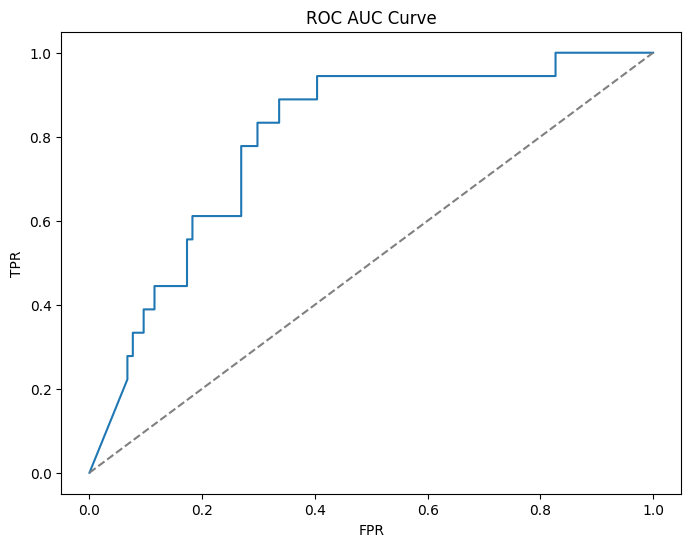

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
y_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thr=roc_curve(y_test,y_prob)
auc_score=roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"ROC Curve AUC ={auc_score:.2f}")
plt.plot([0,1],[0,1],linestyle='--',color='gray',label="Random Guess")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")

In [ ]:
#for a particular user ID predict class and find probability for each class
user_id_to_predict = 1 # Replace with the user ID you want to predict for

# Get the feature vector for the specified user
user_features = df_pivot.loc[[user_id_to_predict]]

# Remove the target movie column from the user features
user_features = user_features.drop(columns=[target_movie_id])

# Predict the class for the user
predicted_class = clf.predict(user_features)

# Get the probability of each class for the user
predicted_probabilities = clf.predict_proba(user_features)

print(f"Prediction for User {user_id_to_predict} for Movie {target_movie_id}: {predicted_class[0]}")
print(f"Probabilities for User {user_id_to_predict} for Movie {target_movie_id}: {predicted_probabilities[0]}")

Prediction for User 1 for Movie 6: 1.0
Probabilities for User 1 for Movie 6: [3.65015247e-07 9.99999635e-01]


In [ ]:
#find top 10 user among all user to whom you can recommend the movie

In [ ]:
# Find the probability of each user liking the target movie
all_user_probabilities = clf.predict_proba(features)[:, 1]

# Create a pandas Series with user IDs as the index and probabilities as values
user_probabilities_series = pd.Series(all_user_probabilities, index=df_pivot.index)

# Filter out users who have already liked the target movie (where the value is 1.0 in df_pivot)
users_to_recommend = user_probabilities_series[df_pivot[target_movie_id] == 0.0]

# Sort the remaining users by probability in descending order
top_users = users_to_recommend.sort_values(ascending=False)

# Get the top 10 user IDs
top_10_user_ids = top_users.head(10).index.tolist()

print(f"Top 10 user IDs to recommend Movie {target_movie_id} to (who haven't liked it yet):")
print(top_10_user_ids)

Top 10 user IDs to recommend Movie 6 to (who haven't liked it yet):
[387, 305, 275, 414, 111, 534, 249, 448, 477, 474]


In [ ]:
#print movie name and top users with probability

In [ ]:

movie_title = movie[movie['movieId'] == target_movie_id]['title'].iloc[0]

print(f"Movie Title: {movie_title}")
print("\nTop 10 users to recommend this movie to (who haven't liked it yet) with their predicted probabilities:")
print(top_10_user_ids)
# Iterate through the top 10 user IDs and print their probabilities
# for user_id in top_10_user_ids:
#     probability = users_to_recommend.loc[user_id]
#     print(f"User ID: {user_id}, Probability: {probability:.4f}")

Movie Title: Heat (1995)

Top 10 users to recommend this movie to (who haven't liked it yet) with their predicted probabilities:
[387, 305, 275, 414, 111, 534, 249, 448, 477, 474]


In [ ]:
#initiate stratified k-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score
import numpy as np

# Define a range of alpha values using np.logspace
alpha_values = np.logspace(-2, 1, 10)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("---><. Stratified K-Fold Cross-Validation .><--")

# Iterate through different alpha values
for alpha in alpha_values:

    auc_scores = []

    # Perform Stratified K-Fold cross-validation
    for fold, (train_index, test_index) in enumerate(skf.split(features, target)):
        # Split data into training and testing sets for the current fold
        X_train_fold, X_test_fold = features.iloc[train_index], features.iloc[test_index]
        y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

        model = BernoulliNB(alpha=alpha)
        model.fit(X_train_fold, y_train_fold)

         # Get the predicted probabilities for the positive class
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]

        #  Calculate AUC for the current fold
        fold_auc = roc_auc_score(y_test_fold, y_prob_fold)

            # Store the AUC score
        auc_scores.append(fold_auc)


    # Calculate and print the average AUC across all folds for the current alpha
    if not np.isnan(auc_scores).all(): # Check if there are any valid AUC scores
        average_auc = np.nanmean(auc_scores) # Use nanmean to ignore NaN values
        print(f"  MEAN AUC for alpha({alpha:.3f}): {average_auc:.4f}")
    else:
        print(f"  Could not calculate average AUC for alpha = {alpha:.3f}")

---><. Stratified K-Fold Cross-Validation .><--
  MEAN AUC for alpha(0.010): 0.7862
  MEAN AUC for alpha(0.022): 0.7825
  MEAN AUC for alpha(0.046): 0.7779
  MEAN AUC for alpha(0.100): 0.7799
  MEAN AUC for alpha(0.215): 0.7741
  MEAN AUC for alpha(0.464): 0.7686
  MEAN AUC for alpha(1.000): 0.7609
  MEAN AUC for alpha(2.154): 0.7554
  MEAN AUC for alpha(4.642): 0.7484
  MEAN AUC for alpha(10.000): 0.5428


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
import numpy as np

# Define the parameter grid to search
param_grid = {'alpha': np.logspace(-2, 1, 10),'fit_prior':[True,False]} #alpha  0.01 to 10

# Initialize the Bernoulli Naive Bayes model
model = BernoulliNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='roc_auc')

# Fit the GridSearchCV to the data
grid_search.fit(features, target)

# Print the best parameters and the best score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best cross-validation AUC score:")
print(grid_search.best_score_)

# The best model is available as grid_search.best_estimator_
best_model = BernoulliNB(alpha=grid_search.best_params_['alpha'])

Best parameters found by GridSearchCV:
{'alpha': np.float64(0.01), 'fit_prior': True}
Best cross-validation AUC score:
0.786197785395033


In [ ]:
# #fit and predict
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.metrics import accuracy_score

# # Initialize and train the Naive Bayes model
# model = BernoulliNB()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Display the predictions and recommend based on prediction
# print("\nPredictions and Recommendations (1: Recommend, 0: Not Recommend):")
# for i, prediction in enumerate(y_pred):
#     user_id = X_test.index[i]
#     movie_id = target_movie_id  # The movie we are predicting for
#     recommendation_status = "Recommend" if prediction == 1 else "Not Recommend"
#     print(f"User {user_id} for Movie {movie_id}: Prediction = {int(prediction)}, Status = {recommendation_status}")


# # Evaluate the model (optional, but good practice)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nAccuracy of the Naive Bayes model: {accuracy}")

Decision tree


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create sample data (X_tr and y_tr with 10 values)
X_tr = np.array([[0, 0], [0, 1], [8, 9], [9,0], [4, 7], [0, 1], [1, 0], [2, 1], [6,3], [1, 1]])
y_tr = np.array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

print("Sample X_tr:")
print(X_tr)
print("\nSample y_tr:")
print(y_tr)

Sample X_tr:
[[0 0]
 [0 1]
 [8 9]
 [9 0]
 [4 7]
 [0 1]
 [1 0]
 [2 1]
 [6 3]
 [1 1]]

Sample y_tr:
[0 0 0 1 0 0 0 1 0 1]


In [ ]:
# Initialize the Decision Tree Classifier
dt_model_sample = DecisionTreeClassifier(criterion='gini' ,max_depth=10, min_samples_split=6,random_state=42)

dt_model_sample.fit(X_tr, y_tr)


DecisionTreeClassifier(max_depth=10, min_samples_split=6, random_state=42)

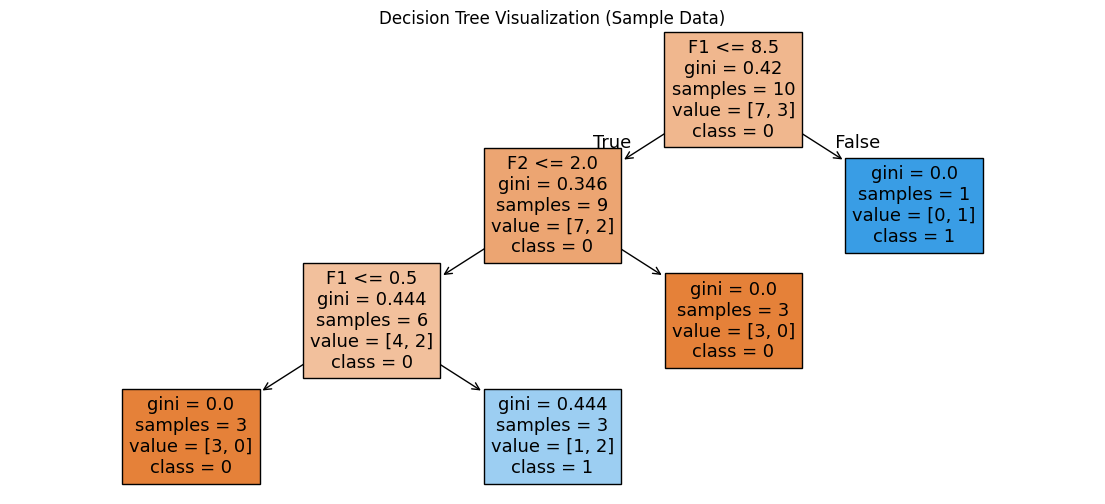

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(14, 6))
plot_tree(dt_model_sample, filled=True, feature_names=['F1', 'F2'], class_names=['0', '1'])
plt.title("Decision Tree Visualization (Sample Data)")
plt.show()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("train_ad.csv")
df.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [ ]:
y=df[['click']]
df=df.drop(columns=['click'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(240000, 23)
(60000, 23)
(240000, 1)
(60000, 1)
